# BE Anomaly detection
Metsanou stephane

M2RO - UPS

AML

# Description du problème
  Pour le problème traité ci-dessous, nous disposons d'une base de données qui contient des informations mesurées sur un système d'avion. Les mesures sont éffectuées sur 100 points pendant une fenêtre, pour un jour et un cycle bien définis, ainsi chaque fenêtre est représentée par 100 observations. Chaque observation est caractérisée par 11 paramètres comme la température, la pression, la vitesse, etc.. Toutes les observations sont enrégistrées dans le fichier "dataset.csv" qui contient 162701 lignes d'observations. L'objectif de notre travail est de proposer une méthode permettant de détecter les différentes fenêtres anormales dans notre base de données. Ceci nous permettra de déterminer et de visualiser les points considérés comme des anomalies, mais à cause d'une analyse en composantes principales et de l'analyse effectuée sur les moyennes des valeurs pour une fenêtre, on ne pourra pas retrouver les paramètres pour lesquels les points sont considérés comme des anomalies. 

#Démarche
  Pour identifier les fenêtres anormales,il est nécessaire pour nous d'identifier chaque fenêtre par des valeurs pour chacunes des 11 paramètres. Ainsi nous avons décidé de faire une moyenne des obversations effectuées sur les 100 points pour chaque fenêtre. Nous appliquerons ensuite les différentes démarches de détection d'anomalie pour identifier les fenêtres de temps potentiellement problématiques. \\
  D'autre part, afin de nous permettre une visualisation en 2 dimensions des résultats de notre détection d'anomalies, on appliquera une Analyse en Composantes Principales afin de projeter nos données sur un espace de dimension inférieure, en préservant le maximum de variance possible à partir du jeu de données original.  

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=1160ec14594165f504457ac87a1c96591ddea4b8e7cfc340c4f13325898e23da
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [ ]:
def split_int(n):
    """
    Permet de transformer 
    111 en '1_1_1' ou 44160 
    en '4_4_160'
    """
    s = str(n)
    sc = s[0]+'_'+s[1]+'_'+s[2:]
    return sc

In [ ]:
from google.colab import files 
dataset = files.upload()   #charger dataset.csv après exécution 

Saving dataset.csv to dataset.csv


In [ ]:
data = pd.read_csv('dataset.csv',sep =',')

#Traitement des données 
On commence par un petit traitement de données sur "dataset.csv" en transformant le type de la colonne "data_cycle_window" en entier afin de bien calculer les moyennes souhaitées. On utilise ensuite la fonction split_int définie ci-dessus pour retrouver la forme de notre DataFrame original, avec les moyennes des valeurs observées sur chaque fenêtre de temps de chaque cycle de chaque jour.  

In [ ]:
data_mean = data.astype({"day_cycle_window" : np.int64})      #transformation des éléments de la colonne en entier
data_mean = data_mean.groupby('day_cycle_window').mean()      #moyenne sur chaque fenêtre
data_mean = data_mean.reset_index()                           #on replace "day_cycle_window" comme colonne

In [ ]:
#transformation de la colonne
temp = list(data_mean["day_cycle_window"])
dcw = [split_int(x) for x in temp]
data_mean["day_cycle_window"] = dcw
data_mean

,day_cycle_window,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
0,1_1_1,-1.926141,-2.456284,-2.487394,-2.481230,-2.388674,-1.984092,-2.447148,-1.169837,2.848242,-1.370045,-2.500060
1,1_1_2,-1.714067,-2.217161,-2.530537,-2.515985,-2.544961,-1.040076,-2.127244,-0.700150,2.246956,-1.545889,-2.654753
2,1_1_3,-1.534357,-1.779994,-1.938747,-1.835152,-2.053982,-0.866705,-1.859002,-0.837695,1.903785,-2.853705,-1.926807
3,1_1_4,-1.415197,-1.453962,-1.888438,-2.249327,-2.206560,-0.732366,-2.144090,-0.687389,1.915830,-0.828060,-2.117340
4,1_1_5,-0.732715,-0.634379,-0.963247,-1.871178,-2.048933,-0.004074,-1.263891,-0.316854,1.779600,-0.932193,-1.796746
...,...,...,...,...,...,...,...,...,...,...,...,...
1632,4_4_156,-0.956537,-1.347865,-1.277796,-1.489708,-1.259816,-1.174963,-1.174717,-1.033134,0.747000,1.698238,-0.708232
1633,4_4_157,-0.984032,-1.350121,-1.296572,-1.473924,-1.277888,-1.056938,-1.176011,-1.036529,0.781643,1.822312,-0.720395
1634,4_4_158,-1.006301,-1.363260,-1.319295,-1.484471,-1.289714,-0.896817,-1.177147,-1.040539,0.738953,1.777215,-0.722794
1635,4_4_159,-1.013992,-1.368401,-1.323755,-1.506278,-1.304717,-0.843966,-1.187889,-1.057283,0.742485,1.701126,-0.734295


#Analyse en Composantes Principales
L'analyse en composantes principales élaborée ci-dessous montre qu'une projection sur 2 dimensions explique 69,64% de variabilité dans notre jeu de données original. On projette ce dernier sur 2 composantes pour obtenir le DataFrame qui sera l'objet de notre démarche de détection d'anomalie :  

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaler.fit(data_mean)
data_mean_scaled = scaler.transform(data_mean)

In [ ]:
pca_11 = PCA(n_components=11)
pca_11.fit(data_mean_scaled)

PCA(n_components=11)

Pourcentage de variance expliquée par 2 composantes : 69.64998023233633


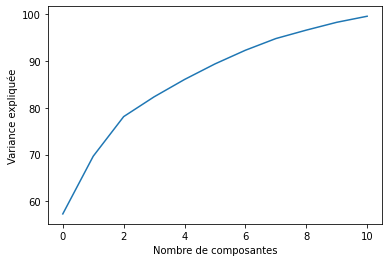

In [ ]:
plt.plot(np.cumsum(pca_11.explained_variance_ratio_*100))
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliquée")
print("Pourcentage de variance expliquée par 2 composantes :",(np.cumsum(pca_11.explained_variance_ratio_*100))[1])

In [ ]:
pca_2 = PCA(n_components=2)
pca_2.fit(data_mean_scaled)
new_df=pd.DataFrame(pca_2.transform(data_mean_scaled),columns=['c1','c2'],index=data_mean.index)
new_df

,c1,c2
0,-7.287842,-1.508829
1,-6.512015,-1.979315
2,-5.186678,-2.595291
3,-5.414680,-1.087426
4,-3.651609,-1.207975
...,...,...
1632,-3.813466,0.663740
1633,-3.814947,0.722740
1634,-3.774804,0.658344
1635,-3.783873,0.590520


# Les modèles de détection d'anomalie

In [ ]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

def plotAnomalies2D(df, clf_name, clf):
    """
        df: Pandas DataFrame containing all the points to plot (for features X1 and X2)
        clf_name: String value - name of the outlier detection model
        clf: Scikit Learn model instance - the trained outlier detection model
    """
    plt.figure(figsize=(10,6))
    plt.plot(df['c1'],df['c2'], '.')
    plt.xlabel('c1')
    plt.ylabel('c2')
    plt.xlim([df['c1'].min()-3,df['c1'].max()+3])
    plt.ylim([df['c2'].min()-3,df['c2'].max()+3])
    plt.title(clf_name)
    
    if clf_name == 'LOF':
        ypred = clf.fit_predict(df[['c1','c2']])
        plt.plot(df['c1'][ypred==-1],df['c2'][ypred==-1],'ro')
    else:
        xx, yy = np.meshgrid(np.linspace(df['c1'].min()-3,df['c1'].max()+3, 500), np.linspace(df['c2'].min()-3,df['c2'].max()+3, 500))
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='r')

def anomaly_percentage(clf, clf_name, new_df):
  if clf_name == 'LOF':
    prediction = clf.fit_predict(new_df)  
  else: 
    prediction = clf.predict(new_df)
  p = sum([1 for x in prediction if x == -1])/len(prediction)*100
  return p

def anomalies(clf, clf_name, new_df):
  list_anomalies = []
  if clf_name == 'LOF':
    prediction = clf.fit_predict(new_df)  
  else: 
    prediction = clf.predict(new_df)
  id_anomalies = [i for i in range(len(prediction)) if prediction[i] == -1]
  for i in id_anomalies:
    list_anomalies.append(data_mean["day_cycle_window"][i])
  return pd.DataFrame(list_anomalies, columns=["day_cycle_window"])

1. ELLIPTIC ENVELOPE

  Avec le classifier Elliptic Envelope, on suppose que les données (les fenêtres) regulières suivent une loi gaussienne, ainsi il s'agit de définir la «forme» des données et ensuite les observations aberrantes sont identifiées comme des observations suffisamment éloignées de la forme d'ajustement. Ce classifier adapte une estimation de covariance robuste aux données, et adapte ainsi une ellipse aux points de données centraux, en ignorant les points en dehors du mode central.

In [ ]:
clf_name = 'Elliptic Envelope'
clf = EllipticEnvelope()
clf.fit(new_df)

EllipticEnvelope()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(


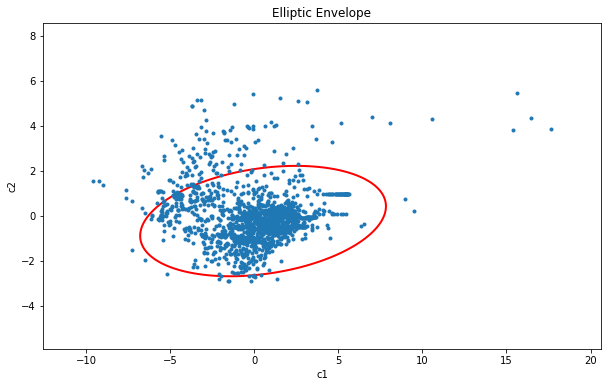

In [ ]:
plotAnomalies2D(new_df, clf_name, clf)

Sur la représentation précédente, les fenêtres anormales sont représentées par les points qui se situent en dehors de l'ellipse.

In [ ]:
print("Pourcentage d'anomalies détectées est  ", anomaly_percentage(clf, clf_name, new_df))
print("Listes des fenetres anormales")
anomalies_EE = anomalies(clf,clf_name,new_df)
display(anomalies_EE)

Pourcentage d'anomalies détectées est   10.01832620647526
Listes des fenetres anormales


,day_cycle_window
0,1_1_1
1,1_1_2
2,1_1_3
3,1_2_1
4,1_2_2
...,...
159,3_3_144
160,3_3_145
161,3_3_146
162,3_3_147


2. ISOLATION FOREST 

  Un moyen efficace d'effectuer une détection des valeurs aberrantes dans des ensembles de données de grande dimension consiste à utiliser des forêts aléatoires. L'Isolation Forest « isolent » les observations en sélectionnant au hasard une caractéristique, puis en sélectionnant au hasard une valeur de fractionnement entre les valeurs maximale et minimale de la caractéristique sélectionnée.  Le partitionnement aléatoire produit des chemins sensiblement plus courts pour les anomalies. Par conséquent, lorsqu'une forêt d'arbres aléatoires produit collectivement des longueurs de chemin plus courtes pour des échantillons particuliers, il est fort probable qu'il s'agisse d'anomalies.





In [ ]:
-clf_name = 'Isolation Forest'
clf = IsolationForest(n_estimators=2000)
clf.fit(new_df)
prediction = clf.predict(new_df)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


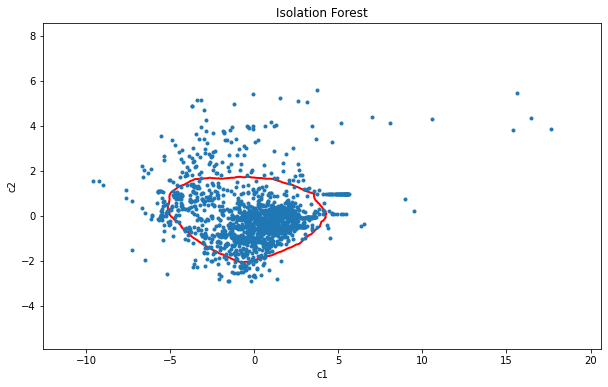

In [ ]:
plotAnomalies2D(new_df, clf_name, clf)

Sur la représentation précédente, les fenêtres anormales sont représentées par les points qui se situent en dehors du contour en rouge.

In [ ]:
print("Pourcentage d'anomalies détectées est ", anomaly_percentage(clf, clf_name, new_df))
print("Listes des fenetres anormales")
anomalies_IF = anomalies(clf,clf_name,new_df)
display(anomalies_IF)

Pourcentage d'anomalies détectées est  20.28100183262065
Listes des fenetres anormales


,day_cycle_window
0,1_1_1
1,1_1_2
2,1_1_3
3,1_1_4
4,1_1_5
...,...
327,4_2_172
328,4_2_175
329,4_2_176
330,4_2_177


3. LOCAL OUTLIER FACTOR

Cette méthode consiste à comparer la densité d'accessibilité d'un point à celle de ses k voisins en se basant sur la distance le séparant de ces derniers. Un facteur (LOF) est calculé à partir de ces densités et un point est considéré comme anomalie si son LOF est strictement supérieur à 1, car ceci implique que le point a une densité inférieure à celle de ses k voisins et donc isolé de ces derniers. \\

On applique la méthode avec k=200 voisins et un taux de contamination par défaut de 0,1 et on obtient les résultats suivants :

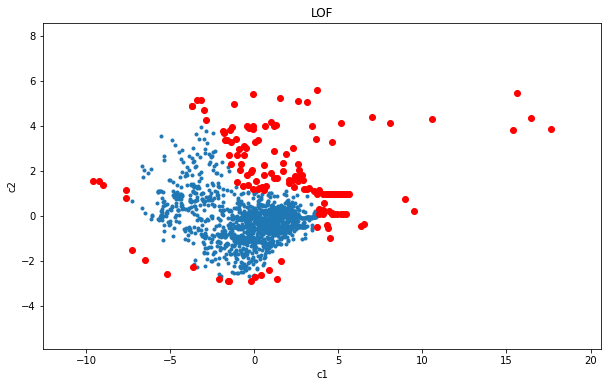

In [ ]:
clf_name = 'LOF'
clf = LocalOutlierFactor(n_neighbors=200)
clf.fit(data_mean)
plotAnomalies2D(new_df, clf_name, clf)

Sur la représentation précédente, les fenêtres anormales sont représentées par les points en rouge.

In [ ]:
print("Pourcentage d'anomalies détectées: ", anomaly_percentage(clf, clf_name, new_df))
print("Listes des fenetres anormales")
anomalies_LOF = anomalies(clf,clf_name,new_df)
display(anomalies_LOF)

Pourcentage d'anomalies détectées:  10.38485033598045
Listes des fenetres anormales


,day_cycle_window
0,1_1_1
1,1_1_2
2,1_1_3
3,1_1_8
4,1_1_9
...,...
165,4_2_139
166,4_2_153
167,4_2_154
168,4_2_179


4. ONE CLASS SVM 

Similaire au SVM traditionnel utilisé pour la classification, la méthode de One class SVM consiste à identifier une frontière entre les points considérés normaux et les points considérés comme des anomalies. Ces frontières sont représentées par des cercles (ou hypersphères en dimension quelconque) entre les points du jeu de données. Les points à l'intérieur du cercle sont considérés normaux tandis que les points à l'extérieur sont de potentielles anomalies. Les résultats de OCSVM appliqué sur notre base de données sont visualisés ci-dessous : 


In [ ]:
clf_name = 'One Class SVM'
clf = OneClassSVM(nu=0.1, kernel="rbf", gamma='auto') 
clf.fit(new_df)

OneClassSVM(gamma='auto', nu=0.1)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(


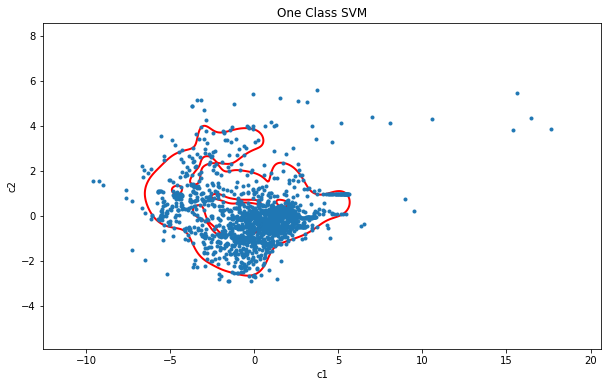

In [ ]:
plotAnomalies2D(new_df, clf_name, clf)

Dans la visualisation ci-dessus, les points à l'extérieur de la frontière rouge sont considérés comme des anomalies.

In [ ]:
print("Pourcentage d'anomalies détectées: ", anomaly_percentage(clf, clf_name, new_df))
print("Listes des fenetres anormales")
anomalies_SVM = anomalies(clf,clf_name,new_df)
display(anomalies_SVM)

Pourcentage d'anomalies détectées:  10.690287110568113
Listes des fenetres anormales


,day_cycle_window
0,1_1_1
1,1_1_2
2,1_1_3
3,1_1_4
4,1_2_1
...,...
170,4_4_125
171,4_4_126
172,4_4_127
173,4_4_140


On regroupe dans un seul tableau les fenêtres considérées comme anomalies par l'ensemble des méthodes de détection utilisées : 

In [ ]:
common_anomalies = set(anomalies_EE["day_cycle_window"]) & set(anomalies_IF["day_cycle_window"]) & set(anomalies_LOF["day_cycle_window"])  & set(anomalies_SVM["day_cycle_window"])
common_anomalies = pd.DataFrame(list(common_anomalies), columns = ["day_cycle_window"])
print("Les fenêtres anormales communes à tous les modèles utilisés ")
display(common_anomalies)

Les fenêtres anormales communes à tous les modèles utilisés 


,day_cycle_window
0,1_2_4
1,3_2_49
2,4_2_12
3,4_2_73
4,2_1_3
5,1_1_65
6,3_1_5
7,2_1_8
8,1_1_2
9,2_2_76


# CONCLUSION


En visualisant les résultats des quatre méthodes utilisées pour la détection d'anomalies sur notre base de données, on remarque que les méthodes identifient un même ensemble de points comme étant anomalies à l'exception de quelques points qui sont considérés normaux pour les unes et anomalies pour les autres. Sachant que la détection d'anomalie a été effectuée après une ACP qui conserve 69% de la variance explqiuée, les résultats des méthodes de détection d'anomalies ne doivent pas être directement utilisés comme base pour la prise de décision, mais un support d'échange avec un expert. On pourra par exemple lui présenter les différents tableaux obtenus plus haut qui regroupent les points considérés comme des anomalies pour chaque méthode qu'il pourra valider ou pas grace aux informations dont il dispose.  